<br><br>

<h1 class="tasks">Using Pandas read_html() Black Friday vs Cyber Monday Analysis</h1>

<br>

In [1]:
%%HTML
<style type="text/css">
    .tasks { color: red; }
    .task { color: blue; }
    .example { color: green; }
</style>

In [2]:
import warnings

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

sns.set()

warnings.filterwarnings('ignore')
np.set_printoptions(precision=3, suppress=True)

pd.set_option('max_rows', 150)

%matplotlib inline

<br><br>

<h2 class="example">Black Friday and Cyber Monday and read_html()</h2>
Example merging data from two Wikipedia data sources:
<br>

##### Black Friday and Cyber Monday Sales
Example compares Black Friday overall sales numbers to Cyber Monday Sales numbers.


In [3]:
url1 = 'https://en.wikipedia.org/wiki/Black_Friday_(shopping)'
url2 = 'https://en.wikipedia.org/wiki/Cyber_Monday'

In [4]:
bfriday = pd.read_html(url1, header=0)[1]
cyber = pd.read_html(url2, header=0)[1]

In [5]:
bfriday

,Year,Date,Survey published,Shoppers (millions),Average spent,Total spent,Consumers polled,Margin for error
0,2020,Nov 27,NaN,NaN,NaN,NaN,NaN,NaN
1,2019,Nov 29,NaN,NaN,NaN,NaN,NaN,NaN
2,2018,Nov 23,NaN,NaN,NaN,NaN,NaN,NaN
3,2017,Nov 24,Nov 28[130],174.0,$335.47,$58.3 billion,3242.0,+/- 1.7%
4,2016,Nov 25,NaN,NaN,NaN,NaN,NaN,NaN
5,2015,Nov 27,NaN,NaN,NaN,NaN,NaN,NaN
6,2014[131],Nov 28,Nov 30,233.0,$380.95,$50.9 billion,4631.0,1.5%
7,2013,Nov 29,Dec 1,249.0,$407.02,$57.4 billion,4864.0,1.7%
8,2012,Nov 23,Nov 25,247.0,$423.66,$59.1 billion,4005.0,1.6%
9,2011,Nov 25,Nov 27,226.0,$398.62,$52.5 billion,3826.0,1.6%


In [6]:
bfriday.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 8 columns):
Year                   16 non-null object
Date                   16 non-null object
Survey published       11 non-null object
Shoppers (millions)    11 non-null float64
Average spent          11 non-null object
Total spent            11 non-null object
Consumers polled       10 non-null float64
Margin for error       10 non-null object
dtypes: float64(2), object(6)
memory usage: 1.1+ KB


In [7]:
bfriday = bfriday.drop(['Margin for error', 'Survey published', 'Date', 
                       'Consumers polled'], axis=1).dropna()
bfriday.Year = bfriday.Year.map(lambda yr: str(yr).split('[')[0]).astype(int)
bfriday['Average spent'] = bfriday['Average spent'].str.lstrip('$').astype(float)
bfriday['Total spent (billions)'] = bfriday['Total spent'].str.lstrip('$').str.strip('billion').astype(float)
bfriday.drop(['Total spent'], axis=1, inplace=True)
bfriday

,Year,Shoppers (millions),Average spent,Total spent (billions)
3,2017,174.0,335.47,58.3
6,2014,233.0,380.95,50.9
7,2013,249.0,407.02,57.4
8,2012,247.0,423.66,59.1
9,2011,226.0,398.62,52.5
10,2010,212.0,365.34,45.0
11,2009,195.0,343.31,41.2
12,2008,172.0,372.57,41.0
13,2007,147.0,347.55,34.6
14,2006,140.0,360.15,34.4


In [8]:
cyber

,Day,Year,Sales(millionsof USD),% Change
0,November 27,2006,$610,NaN
1,November 26,2007,$730,20%
2,December 1,2008,$846,16%
3,November 30,2009,$887,4.7%
4,November 29,2010,"$1,028",16%
5,November 28,2011,"$1,251",22%
6,November 26,2012,"$1,465",17%
7,December 2,2013,"$1,735",18%
8,December 1,2014,"$2,038[23]",17%
9,November 30,2015,"$2,280",12%


In [9]:
cyber.drop(['Day', '% Change'], axis=1, inplace=True)
cyber = cyber.rename({'Sales(millionsof USD)': 'Cyber Mon. (millions)'}, axis=1)

In [10]:
pd.isnull(cyber).sum()

Year                     0
Cyber Mon. (millions)    0
dtype: int64

In [11]:
cyber

,Year,Cyber Mon. (millions)
0,2006,$610
1,2007,$730
2,2008,$846
3,2009,$887
4,2010,"$1,028"
5,2011,"$1,251"
6,2012,"$1,465"
7,2013,"$1,735"
8,2014,"$2,038[23]"
9,2015,"$2,280"


In [12]:
cyber.dropna(inplace=True)
cyber['Cyber Mon. (millions)'] = cyber['Cyber Mon. (millions)'].str.lstrip('$').str.replace(',', '').map(lambda val: str(val).split('[')[0]).astype(int)
cyber

,Year,Cyber Mon. (millions)
0,2006,610
1,2007,730
2,2008,846
3,2009,887
4,2010,1028
5,2011,1251
6,2012,1465
7,2013,1735
8,2014,2038
9,2015,2280


In [13]:
merged = pd.merge(bfriday, cyber, on='Year').sort_values(by='Year')
merged

,Year,Shoppers (millions),Average spent,Total spent (billions),Cyber Mon. (millions)
9,2006,140.0,360.15,34.4,610
8,2007,147.0,347.55,34.6,730
7,2008,172.0,372.57,41.0,846
6,2009,195.0,343.31,41.2,887
5,2010,212.0,365.34,45.0,1028
4,2011,226.0,398.62,52.5,1251
3,2012,247.0,423.66,59.1,1465
2,2013,249.0,407.02,57.4,1735
1,2014,233.0,380.95,50.9,2038
0,2017,174.0,335.47,58.3,3364


In [14]:
merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10 entries, 9 to 0
Data columns (total 5 columns):
Year                      10 non-null int32
Shoppers (millions)       10 non-null float64
Average spent             10 non-null float64
Total spent (billions)    10 non-null float64
Cyber Mon. (millions)     10 non-null int32
dtypes: float64(3), int32(2)
memory usage: 400.0 bytes


In [15]:
pd.isnull(merged).sum() 

Year                      0
Shoppers (millions)       0
Average spent             0
Total spent (billions)    0
Cyber Mon. (millions)     0
dtype: int64

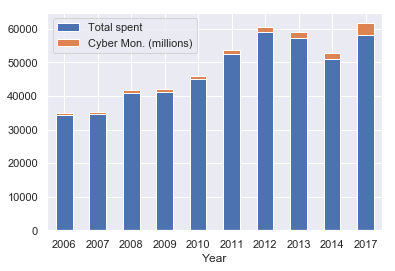

In [16]:
merged['Total spent'] = merged['Total spent (billions)'] * 1000
merged.plot(kind='bar', x='Year', y=['Total spent', 'Cyber Mon. (millions)'], rot=0, stacked=True);